In [1]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

targets = []
features = []

print('start parsing ...')
files = glob.glob('all/train/train/*.jpg')
random.shuffle(files)
print('parsing ok.')

for file in files:
    features.append(np.array(Image.open(file).resize((100, 100))))
    target = [1, 0] if "cat" in file else [0, 1]
    targets.append(target)

features = np.array(features)
targets = np.array(targets)

print (features.shape)
print (targets.shape)

start parsing ...
parsing ok.
(25000, 100, 100, 3)
(25000, 2)


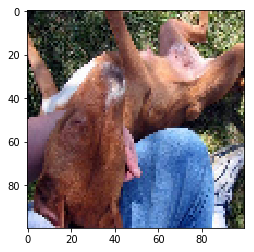

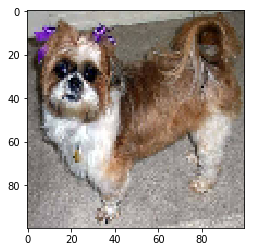

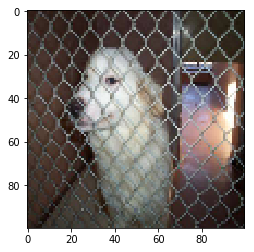

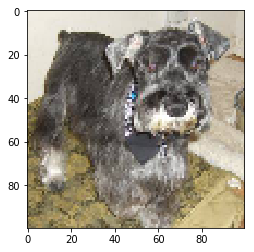

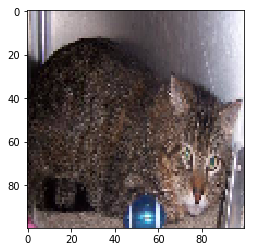

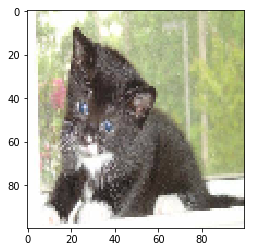

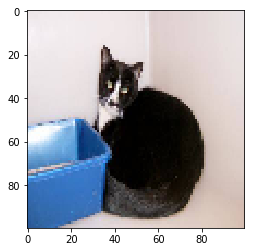

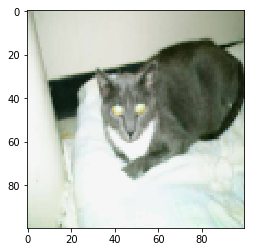

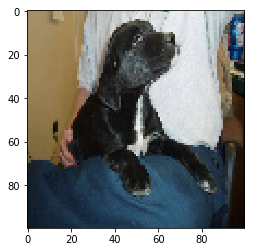

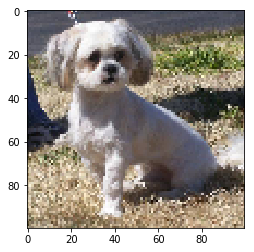

In [2]:
from random import randint

for idx in [randint(0, len(features)) for _ in range(10)]:
    plt.imshow(features[idx], cmap='gray')
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(features, targets, test_size=0.3, random_state=42)



In [12]:
import keras
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
import tensorflow as tf

model = Sequential()
model.add(Conv2D(32, kernel_size=(8, 8), strides=(1, 1),
                 activation='relu',
                 input_shape=(100, 100, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128, (5, 5), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(215, (5, 5), strides=(1, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 100, 100, 32)      6176      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 50, 50, 64)        51264     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 25, 25, 128)       204928    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 256)       819456    
__________

In [15]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,
          batch_size=100,
          epochs=50,
          verbose=1,
          validation_data=(X_valid, y_valid))

Train on 17500 samples, validate on 7500 samples
Epoch 1/50
17500/17500 [==============================] - 31s 2ms/step - loss: 0.6139 - acc: 0.6524 - val_loss: 0.6383 - val_acc: 0.6183
Epoch 2/50
17500/17500 [==============================] - 30s 2ms/step - loss: 0.6102 - acc: 0.6578 - val_loss: 0.5810 - val_acc: 0.7067
Epoch 3/50
17500/17500 [==============================] - 30s 2ms/step - loss: 0.6034 - acc: 0.6637 - val_loss: 0.5760 - val_acc: 0.7126
Epoch 4/50
17500/17500 [==============================] - 30s 2ms/step - loss: 0.6005 - acc: 0.6649 - val_loss: 0.5703 - val_acc: 0.6951
Epoch 5/50
17500/17500 [==============================] - 30s 2ms/step - loss: 0.5920 - acc: 0.6794 - val_loss: 0.5630 - val_acc: 0.7251
Epoch 6/50
17500/17500 [==============================] - 30s 2ms/step - loss: 0.5908 - acc: 0.6696 - val_loss: 0.5566 - val_acc: 0.7195
Epoch 7/50
17500/17500 [==============================] - 30s 2ms/step - loss: 0.5832 - acc: 0.6836 - val_loss: 0.5592 - val_acc:

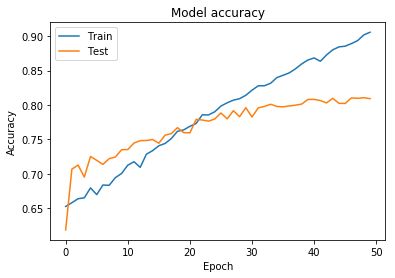

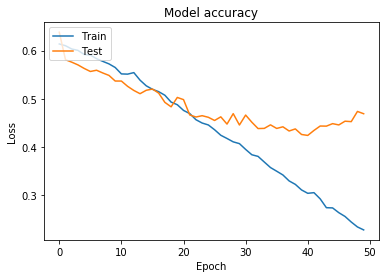

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()